In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Номинальные признаки

Таблица сопряжённости

In [2]:
obs = np.array([[47, 7], [49, 30], [65, 85]])

Критерий хи-квадрат Пирсона

In [3]:
stats.chi2_contingency(obs)

Chi2ContingencyResult(statistic=32.10100028675503, pvalue=1.0699324413773575e-07, dof=2, expected_freq=array([[30.72084806, 23.27915194],
       [44.9434629 , 34.0565371 ],
       [85.33568905, 64.66431095]]))

Нормированные коэффициенты

In [4]:
chi2=stats.chi2_contingency(obs)[0]
n = np.sum(obs)
k = obs.shape[0]
m = obs.shape[1]

tschuprow = np.sqrt(chi2 / (n * np.sqrt((k - 1) * (m - 1))))
cramer = np.sqrt(chi2 / (n * (np.minimum(k, m) - 1)))
pearson = np.sqrt(chi2 / (n + chi2))

print(tschuprow)
print(cramer)
print(pearson)

0.28320998830504696
0.3367953331321993
0.3191790603338492


### Порядковые признаки

In [2]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11])
y = np.array([10.7,10.4,10.2,10.3,10.1,11,10.6,10.8,10.9,10.5,11])

Спирмен

In [4]:
stats.spearmanr(x,y)

SignificanceResult(statistic=0.523919354714936, pvalue=0.09808326136414804)

Кендалл

In [5]:
stats.kendalltau(x,y)

SignificanceResult(statistic=0.3302891295379082, pvalue=0.15985367483762747)

### Количественные признаки

Наблюдения

In [6]:
x = np.array([22.49,22.56,23.45,22.58,24.3,24.2,23.47,23.5,24.48,25.02,23.04,23.24,25.2,24.61,26.02])
y = np.array([52.93,53.4,53.7,53.36,61.8,55.2,53.54,58.33,60.4,60.3,54.28,53.6,62.24,54.45,61.52])

In [7]:
x = stats.norm(loc=1, scale=7).rvs(size=100)
v = stats.norm(loc=1, scale=7).rvs(size=100)
y = 0.4*x**2 + 0.6*v

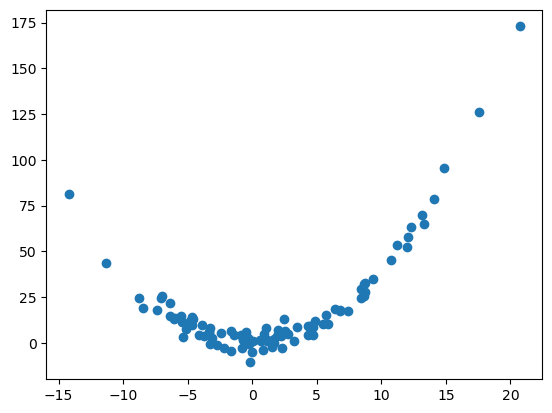

In [8]:
plt.scatter(x, y)
plt.show()

Выборочная корреляция

In [9]:
stats.pearsonr(x, y)

PearsonRResult(statistic=0.5564234613400586, pvalue=1.8464116707425071e-09)

Спирмен

In [10]:
stats.spearmanr(x,y)

SignificanceResult(statistic=0.3248964896489649, pvalue=0.0009735186222134997)

Коэффициент Кендалла

In [11]:
stats.kendalltau(x,y)

SignificanceResult(statistic=0.2460606060606061, pvalue=0.0002863491855254549)

Переход к номинальной шкале

In [12]:
def to_nominal(X, Y, N):
    x_step = (max(X) - min(X)) / N
    y_step = (max(Y) - min(Y)) / N
    
    y = max(Y)    
    n = len(Y)
    nom = []
    while y > min(Y):
        row = []
        x = min(X)
        while x < max(X):
            count = 0
            for i in range(n):
                if (X[i] >= x) & (X[i] < x + x_step) & (Y[i] >= y) & (Y[i] < y + y_step):
                    count += 1
            row.append(count)
            x += x_step        
        nom.append(row)
        y -= y_step
    nom[N - 1][N - 1] += 1
    return np.array(nom)

Таблица сопряжённости

In [13]:
contin = to_nominal(x, y, 3)
print(contin)

[[ 0  0  1]
 [ 0  0  1]
 [ 1  0  9]
 [27 59  2]]


Критерий хи-квадрат Пирсона

In [14]:
stats.chi2_contingency(contin)

Chi2ContingencyResult(statistic=75.03059440559441, pvalue=3.783054644569062e-14, dof=6, expected_freq=array([[ 0.28,  0.59,  0.13],
       [ 0.28,  0.59,  0.13],
       [ 2.8 ,  5.9 ,  1.3 ],
       [24.64, 51.92, 11.44]]))